In [31]:
import sys
sys.path.append('pyFiles')
from largeEnv import CustomEnvironment
import networkx as nx
import pprint
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

## Q value

In [32]:
def q_val(env,state,action,s_values):
    env.reset()
    env.state = state
    reward = 0
    observations, rewards, terminations, truncations, infos = env.step(action)
    s_val_index = state_index_calculator(env,observations)
    for agent in env.possible_police:
        reward = rewards[agent]
    return reward + 0.9*s_values[s_val_index]

## State Value Function , Max Action Function , State Index Calculator, State Calculator


In [33]:
def s_val(env,state,s_values):
    for thief in env.possible_thieves:
        for police in env.possible_police:
            if state[thief] == state[police]:
                return 0
    q_values = []
    for j in range(4):
        for k in range(4):
            for l in range(4):
                temp_state = state.copy()
                action = {env.possible_agents[0]:random.randint(0,4),env.possible_agents[1]:k,env.possible_agents[2]:l} 
                q_values.append(q_val(env,temp_state,action,s_values))
    return max(q_values)

def max_act(env,state,s_values):
#     action = {env.possible_agents[0]:0,env.possible_agents[1]:0,env.possible_agents[2]:0,env.possible_agents[3]:0}
#     for thief in env.possible_thieves:
#         for police in env.possible_police:
#             if state[thief] == state[police]:
#                 return action
    q_values = [] 
    actions = []
    temp_state = state.copy()
    for k in range(4):
        for l in range(4):
            temp_state = state.copy()
            action = {env.possible_agents[0]:random.randint(0,3),env.possible_agents[1]:k,env.possible_agents[2]:l}
            q_values.append(q_val(env,temp_state,action,s_values))
            actions.append(action)
    max_val = max(q_values)
    max_val_index = q_values.index(max_val)
    env.state = state
    return actions[max_val_index]

def state_index_calculator(env,state):
    """ every possible state maps to an index. this function maps state to its index
    """
    multiplier = 1
    state_index = 0
    for agent in env.possible_agents:
        state_index += env.node_inv_dict[state[agent]]* multiplier
        multiplier *= env.g_no_node
    return state_index

def state_calculator(env,state_index):
    """ every possible state maps to an index. this function maps index to state
    """
    temp_state = {}
    for n in range (3):
        temp_state[env.possible_agents[n]] = env.node_dict[(state_index // (env.g_no_node**(3-n)))]
        state_index = state_index % (env.g_no_node**(3-n))
    return temp_state

## Single Sweep

In [34]:
def single_sweep(env,s_values):
    temp_value_func = [0] * env.g_no_node ** 3
    for i in range(env.g_no_node**3):
        state= state_calculator(env,i)
        temp_value_func[i] = s_val(env,state,s_values)
    return temp_value_func

## Until Convergence

In [35]:
env = CustomEnvironment() 
print(env.possible_agents)
print(env.g_no_node**3)
print(env)

['thief_0', 'police_0', 'police_1']
6859
custom_graph_environment_v1


In [36]:
state = env.reset()
s_values = [0] * env.g_no_node ** 3
delta = 5000
diff = 10000
count = 30
while (diff > delta):
    state = env.reset()
    temp_value_func = [v for v in s_values]
    s_values = single_sweep(env,s_values)
    temp_diff = 0;
    for index in range(len(s_values)):
        temp_diff += abs(temp_value_func[index]-s_values[index])
    diff = temp_diff
    # plt.plot(range(env.g_no_node**3),s_values)
    # plt.show()

    print(temp_diff)
# print(s_values)
s_values2 = [0] * env.g_no_node ** 3


21222.0
29355.700000002907
32709.14999999915
36164.6990000013
36908.70410000151
36153.990900000885
35251.34795999923
32698.45643799944
30066.865636797414
26974.530683557776
24628.349754353207
22769.116116090303
21143.267949029974
20134.69002192128
18765.071758560134
16302.469844110135
14599.885837965421
13603.71219024997
12701.560610983892
12073.144259817698
11496.732783592013
11260.067811582325
10409.182643376662
10109.541038356734
9019.820416983119
8310.493120476925
7797.014165694555
7839.120875963235
7507.882736219909
7464.007319470203
6842.005254344486
7541.126907003407
7809.672647765529
7742.487061164628
8334.250366927548
8794.037925308852
9023.58456106856
9801.630578032276
8607.310133071895
8376.986267478866
7902.95620634116
8441.271342689517
8787.126466839823
8797.367904579152
8455.199551926047
7503.288904658335
6152.3205148445595
6173.153411363804
5829.011737160843
5222.712331027218
5114.649785750958
5325.621215255675
5445.655910670773
5230.113136339918
5680.459180885799
6511.7

## Visualization of convergence

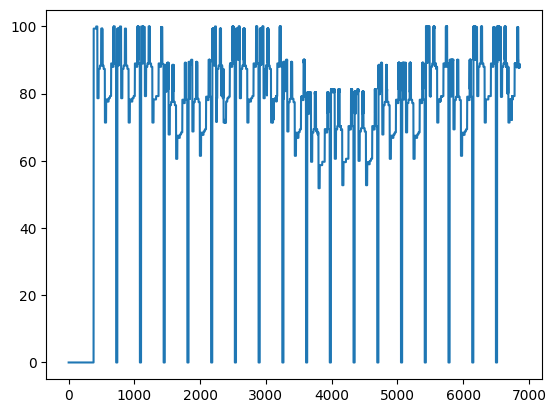

In [37]:
plt.plot(range(env.g_no_node**3),s_values)
plt.show()

<Axes: >

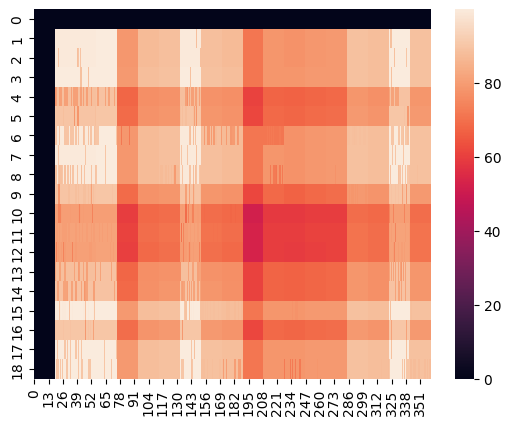

In [38]:
import seaborn as sns
import numpy as np
no_of_nodes = 19
x = np.zeros((no_of_nodes**1,no_of_nodes**2))

for n in range(len(s_values)):
    i = n // no_of_nodes**2
    j = n % no_of_nodes**2
    x[i,j] = s_values[n]

# sns.set(rc={'figure.figsize':(13,10)})
sns.heatmap(x)

## Implementataion of Policy

Run no 1

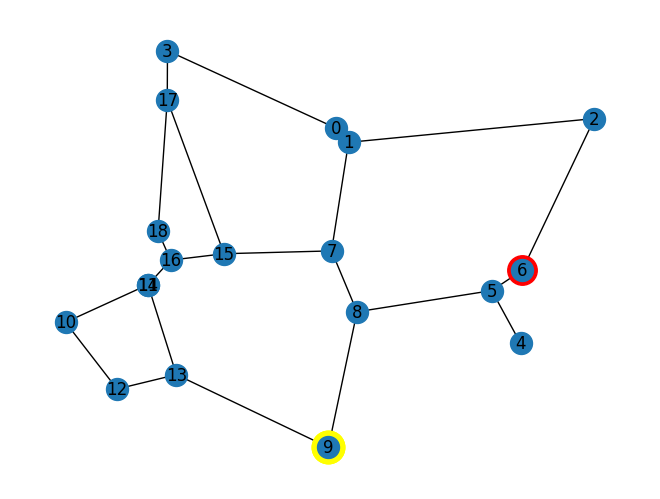

{'thief_0': '(0.8094125332714186, 0.3465499248356554)', 'police_0': '(0.565075255173567, 0.3032727813989422)', 'police_1': '(0.565075255173567, 0.3032727813989422)'}
{'thief_0': '(0.8094125332714186, 0.3465499248356554)', 'police_0': '(0.565075255173567, 0.3032727813989422)', 'police_1': '(0.565075255173567, 0.3032727813989422)'}


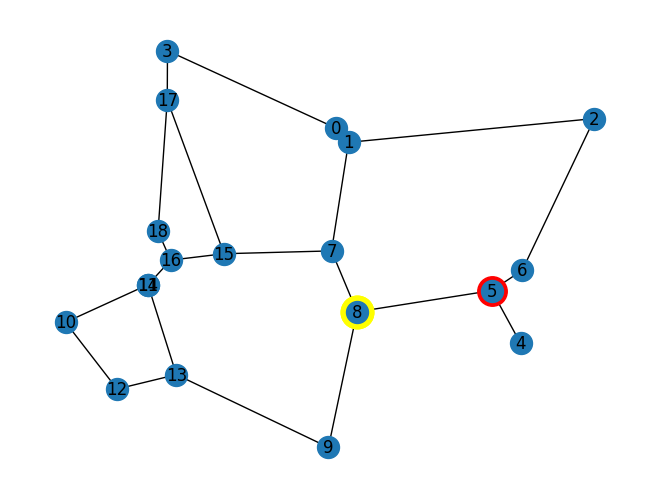

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.8646810135375538, 0.38803400659007303)', 'police_0': '(0.5188809844123248, 0.4275302128012416)', 'police_1': '(0.565075255173567, 0.3032727813989422)'}
{'thief_0': '(0.8646810135375538, 0.38803400659007303)', 'police_0': '(0.5188809844123248, 0.4275302128012416)', 'police_1': '(0.565075255173567, 0.3032727813989422)'}


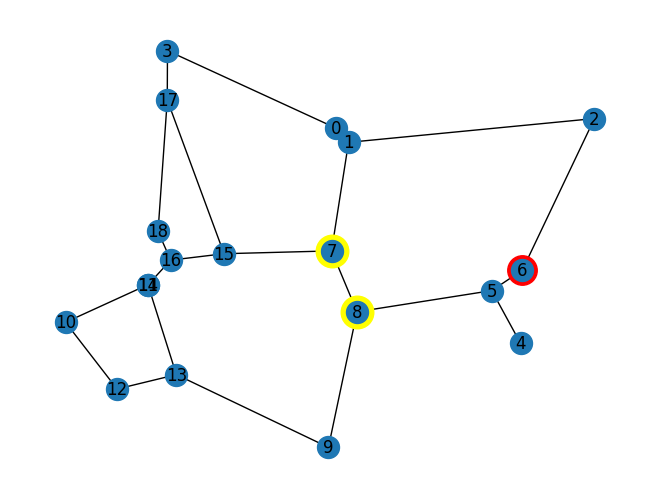

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.8094125332714186, 0.3465499248356554)', 'police_0': '(0.5188809844123248, 0.4275302128012416)', 'police_1': '(0.8094125332714186, 0.3465499248356554)'}
{'thief_0': '(0.8094125332714186, 0.3465499248356554)', 'police_0': '(0.5188809844123248, 0.4275302128012416)', 'police_1': '(0.8094125332714186, 0.3465499248356554)'}


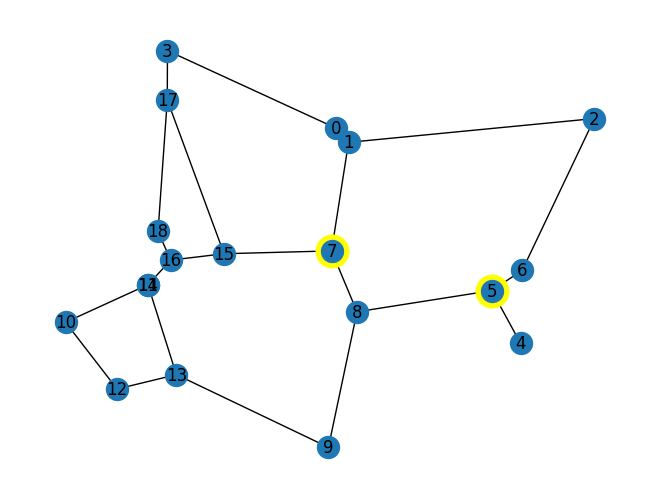

{'thief_0': True, 'police_0': False, 'police_1': False}
terminating episode = 2
Episode: 1 Score: {'thief_0': -4, 'police_0': -5, 'police_1': 7} 



In [39]:

episodes = 1    
for episode in range(1,episodes+1):
    state = env.reset()
    terminations = {agent:False for agent in env.possible_agents}
    score = {a:0 for a in env.possible_agents}
    count = 0
    env.temp_render(episode)
    terminated = False
    while not terminated:
        action = max_act(env,state,s_values)
        observations, rewards, terminations, truncations, infos = env.step(action)
        state = env.state
        print(observations)
        print(env.state)
        env.temp_render(episode)
        print(terminations)
        if (terminations['thief_0'] == True):
            print('terminating episode = {}'.format(count))
            terminated = True
        for agent in env.agents:
            score[agent] += rewards[agent]
        count += 1
    print('Episode: {} Score: {} \n'.format(episode,score))

Run no 2

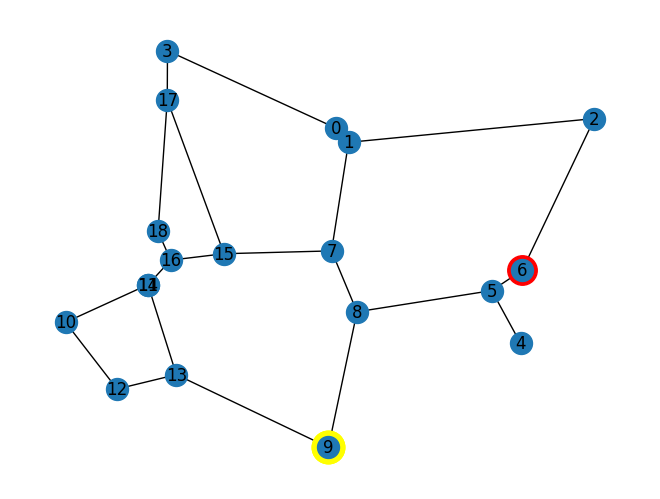

{'thief_0': '(0.8094125332714186, 0.3465499248356554)', 'police_0': '(0.565075255173567, 0.3032727813989422)', 'police_1': '(0.565075255173567, 0.3032727813989422)'}
{'thief_0': '(0.8094125332714186, 0.3465499248356554)', 'police_0': '(0.565075255173567, 0.3032727813989422)', 'police_1': '(0.565075255173567, 0.3032727813989422)'}


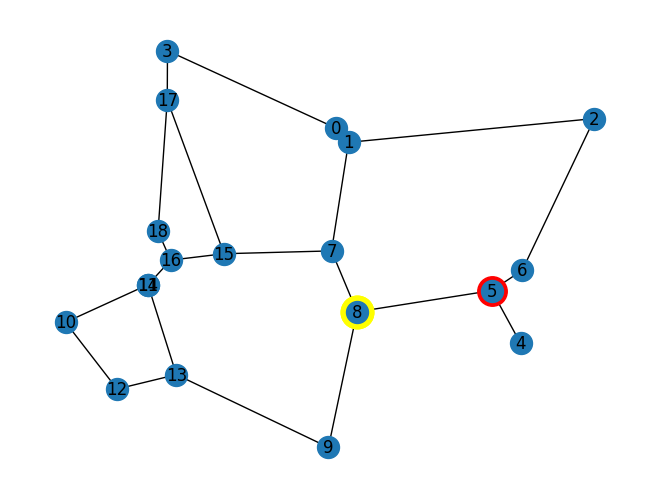

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.565075255173567, 0.3032727813989422)', 'police_0': '(0.5188809844123248, 0.4275302128012416)', 'police_1': '(0.565075255173567, 0.3032727813989422)'}
{'thief_0': '(0.565075255173567, 0.3032727813989422)', 'police_0': '(0.5188809844123248, 0.4275302128012416)', 'police_1': '(0.565075255173567, 0.3032727813989422)'}


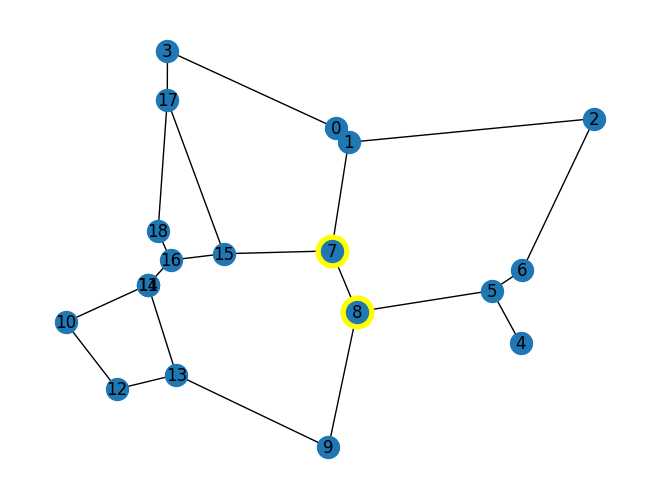

{'thief_0': True, 'police_0': False, 'police_1': False}
terminating episode = 1
Episode: 1 Score: {'thief_0': -2, 'police_0': -4, 'police_1': 8} 



In [40]:

episodes = 1    
for episode in range(1,episodes+1):
    state = env.reset()
    terminations = {agent:False for agent in env.possible_agents}
    score = {a:0 for a in env.possible_agents}
    count = 0
    env.temp_render(episode)
    terminated = False
    while not terminated:
        action = max_act(env,state,s_values)
        observations, rewards, terminations, truncations, infos = env.step(action)
        state = env.state
        print(observations)
        print(env.state)
        env.temp_render(episode)
        print(terminations)
        if (terminations['thief_0'] == True):
            print('terminating episode = {}'.format(count))
            terminated = True
        for agent in env.agents:
            score[agent] += rewards[agent]
        count += 1
    print('Episode: {} Score: {} \n'.format(episode,score))

Run no 3

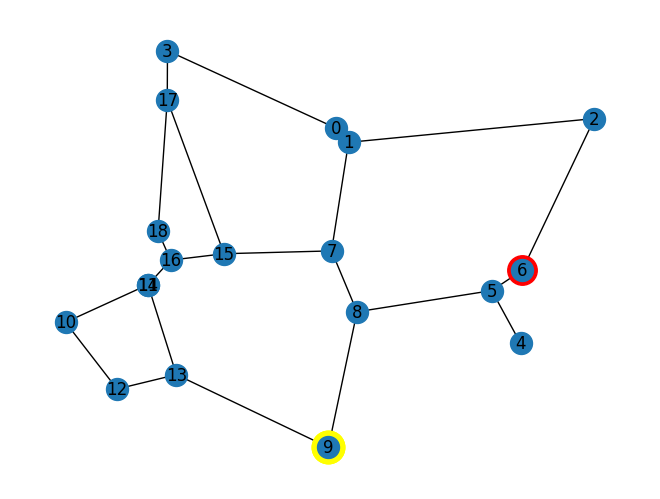

{'thief_0': '(0.8646810135375538, 0.38803400659007303)', 'police_0': '(0.565075255173567, 0.3032727813989422)', 'police_1': '(0.565075255173567, 0.3032727813989422)'}
{'thief_0': '(0.8646810135375538, 0.38803400659007303)', 'police_0': '(0.565075255173567, 0.3032727813989422)', 'police_1': '(0.565075255173567, 0.3032727813989422)'}


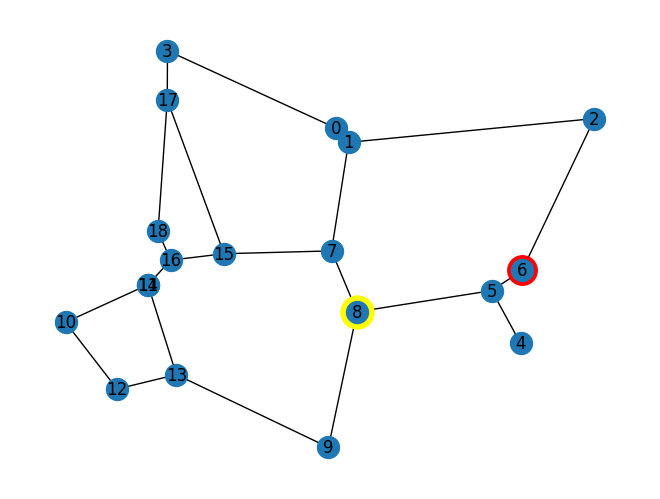

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.8646810135375538, 0.38803400659007303)', 'police_0': '(0.5188809844123248, 0.4275302128012416)', 'police_1': '(0.565075255173567, 0.3032727813989422)'}
{'thief_0': '(0.8646810135375538, 0.38803400659007303)', 'police_0': '(0.5188809844123248, 0.4275302128012416)', 'police_1': '(0.565075255173567, 0.3032727813989422)'}


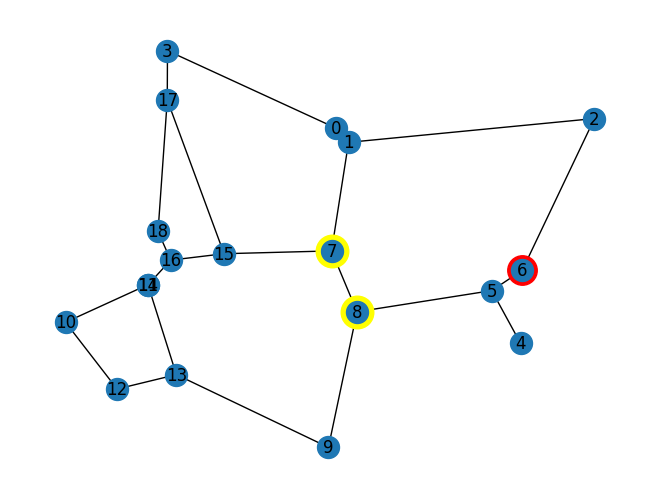

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.8646810135375538, 0.38803400659007303)', 'police_0': '(0.5188809844123248, 0.4275302128012416)', 'police_1': '(0.565075255173567, 0.3032727813989422)'}
{'thief_0': '(0.8646810135375538, 0.38803400659007303)', 'police_0': '(0.5188809844123248, 0.4275302128012416)', 'police_1': '(0.565075255173567, 0.3032727813989422)'}


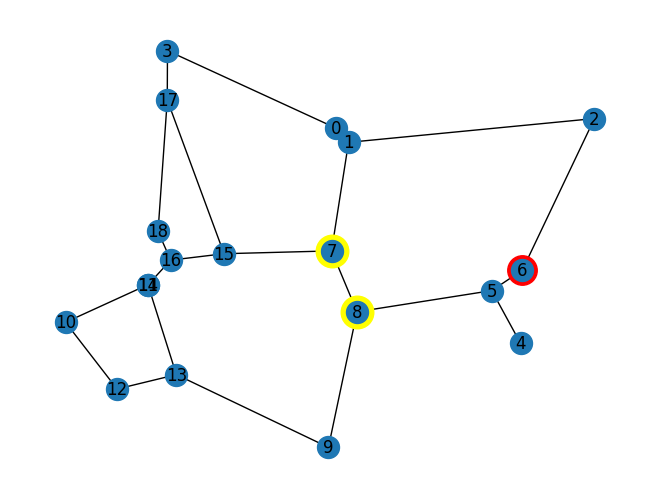

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.8094125332714186, 0.3465499248356554)', 'police_0': '(0.5497170519864252, 0.6489559391432813)', 'police_1': '(0.8094125332714186, 0.3465499248356554)'}
{'thief_0': '(0.8094125332714186, 0.3465499248356554)', 'police_0': '(0.5497170519864252, 0.6489559391432813)', 'police_1': '(0.8094125332714186, 0.3465499248356554)'}


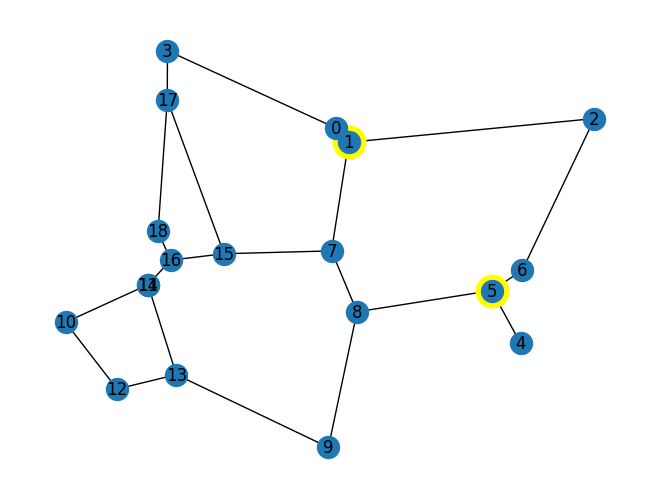

{'thief_0': True, 'police_0': False, 'police_1': False}
terminating episode = 3
Episode: 1 Score: {'thief_0': -21, 'police_0': -7, 'police_1': 6} 



In [41]:

episodes = 1    
for episode in range(1,episodes+1):
    state = env.reset()
    terminations = {agent:False for agent in env.possible_agents}
    score = {a:0 for a in env.possible_agents}
    count = 0
    env.temp_render(episode)
    terminated = False
    while not terminated:
        action = max_act(env,state,s_values)
        observations, rewards, terminations, truncations, infos = env.step(action)
        state = env.state
        print(observations)
        print(env.state)
        env.temp_render(episode)
        print(terminations)
        if (terminations['thief_0'] == True):
            print('terminating episode = {}'.format(count))
            terminated = True
        for agent in env.agents:
            score[agent] += rewards[agent]
        count += 1
    print('Episode: {} Score: {} \n'.format(episode,score))